# Data Exploration and Cleansing

### 1. Load Data File

In [103]:
#Import of needed packages 
import pandas as pd
import numpy as np

In [104]:
#Read Data
kc_df = pd.read_csv("/Users/juliaschafer/nf-sep-20/cgn-2020-ds-Project-EDA/King_County_House_prices_dataset.csv")

# to suppress scientifc notation of  numbers:
pd.options.display.float_format = '{:20,.2f}'.format

#enable horizontal scrolling in dataframes
pd.set_option("display.max_columns", None)

Have a look at the data structure. 

In [105]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503




<b>
    

### 2. First Look at Dataframe

In [106]:
#Data overview
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### Insights
* ID, waterfront, view, condition, grade, zipcode are numeric but categorical data. So they need to be changed to categories. 
* Dates needs to be changed to datetime type. Also, the data is easier to handle when transformed into months instead of daytime. 
* Sqft_basement data type needs to be changed to numeric 
* Missing values in waterfront, view, yr_renovated must be handled.
* Data type of zipcode should be string and changed to category.

#### Descriptives of raw data

In [107]:
 kc_df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,534.00","21,597.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00","1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00","1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00","1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","2,015.00","2,015.00","98,199.00",47.78,-121.32,"6,210.00","871,200.00"


##### Insights
* great dispersion of prices, living and lot area, living area above ground, neighbourhood variables
* renovation year: most of the houses are not renovated ( =0)
*  only few houses with waterfront
* There seem to be many (max) outliers in most variables, also in the target variable

### 3. First Look at Variables (outliers, unusual data, data format etc.) 

Variables are converted to more suitable data formats (v. s.) or recoded.
Boxplots are shown in order to have a better idea of dispersion and outliers.

#### Date 

In [108]:
# Change data format of date from string to datetime
import datetime
kc_df.date = pd.to_datetime(kc_df.date)

In [109]:
#Change datetime to month 
kc_df.date = kc_df.date.dt.month

#### Price 



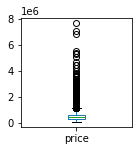

In [110]:
kc_df.price.plot(kind = "box", figsize = (2, 2));

#### Bedrooms

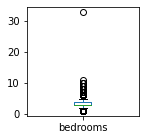

In [111]:
kc_df.bedrooms.plot(kind = "box", figsize = (2, 2));

#### Bathrooms

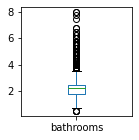

In [112]:
kc_df.bathrooms.plot(kind = "box", figsize = (2, 2));

#### Square feet living

Since I am used to the metric system, I want to convert square feet to metres. The data is easier for me to interpret.

In [113]:
# Convert square feet to square meters:
kc_df.sqft_living = kc_df.sqft_living * 0.092903
kc_df.head()

#rename column
kc_df.rename(columns={"sqft_living": "qm_living"}, inplace = True)

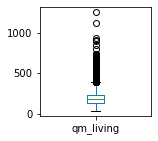

In [114]:
kc_df.qm_living.plot(kind = "box", figsize = (2, 2));

#### Square feet Lot 

In [115]:
# Convert square feet to square meters:
kc_df.sqft_lot = kc_df.sqft_lot * 0.092903
kc_df.head()

#rename column
kc_df.rename(columns={"sqft_lot": "qm_lot"}, inplace = True)

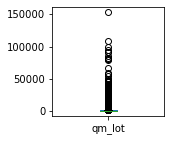

In [116]:
kc_df.qm_lot.plot(kind = "box", figsize = (2, 2));

#### Floors

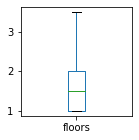

In [117]:
kc_df.floors.plot(kind = "box", figsize = (2, 2));

#### Waterfront 

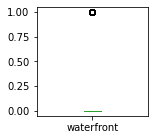

In [118]:
kc_df.waterfront.plot(kind = "box", figsize = (2, 2));

#### View

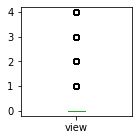

In [119]:
kc_df.view.plot(kind = "box", figsize = (2, 2));

#### Condition

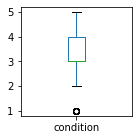

In [120]:
kc_df.condition.plot(kind = "box", figsize =(2, 2));

#### Grade

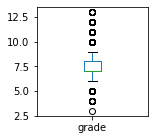

In [121]:
kc_df.grade.plot(kind = "box", figsize = (2, 2));

#### Area above ground

In [122]:
#Convert feet to m:
kc_df.sqft_above = kc_df.sqft_above * 0.3048

In [123]:
#rename column
kc_df.rename(columns={"sqft_above": "qm_above_ground"}, inplace = True)

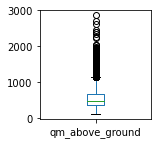

In [124]:
kc_df.qm_above_ground.plot(kind = "box", figsize = (2,2));

#### Area basement 

In [125]:
#Since there is an '?' in the data, the value is changed to NaN:
kc_df.sqft_basement = kc_df.sqft_basement.replace("?", np.NaN).astype(float)

In [126]:
#Convert feet to m:
kc_df.sqft_basement = kc_df.sqft_basement * 0.3048

In [127]:
kc_df.rename(columns={'sqft_basement': 'qm_basement'}, inplace = True)

#### year built

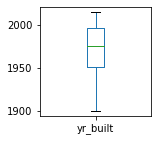

In [128]:
kc_df.yr_built.plot(kind='box', figsize = (2,2));

#### Year renovated

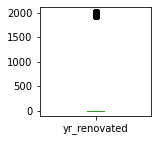

In [129]:
kc_df.yr_renovated.plot(kind="box", figsize = (2,2));

#### ZIP Code

In [130]:
kc_df.zipcode = kc_df.zipcode.astype('str')

#### Living area neighbours

In [131]:
# Convert square feet to square meters:
kc_df.sqft_living15 = kc_df.sqft_living15 * 0.092903
kc_df.head()

#rename column
kc_df.rename(columns={"sqft_living15": "qm_living15"}, inplace = True)


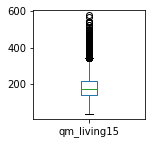

In [132]:
kc_df.qm_living15.plot(kind = "box", figsize = (2,2));

#### Lot area neighbours

In [133]:
# Convert square feet to square meters:
kc_df.sqft_lot15 = kc_df.sqft_lot15 * 0.092903
kc_df.head()

#rename column
kc_df.rename(columns={"sqft_lot15": "qm_lot15"}, inplace = True)

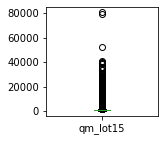

In [134]:
kc_df.qm_lot15.plot(kind = "box", figsize = (2,2));

#### Missing data

In [135]:
missing = pd.DataFrame(kc_df.isnull().sum(),columns=['frequency'])
missing['percentage'] = round(missing.frequency/kc_df.shape[0]*100,1)
missing[missing.frequency!=0]

,frequency,percentage
waterfront,2376,11.00
view,63,0.30
qm_basement,454,2.10
yr_renovated,3842,17.80


What should be done with the missing data?

In [136]:
kc_df.view.value_counts()

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64

In [137]:
kc_df.waterfront.value_counts()

0.00    19075
1.00      146
Name: waterfront, dtype: int64

In [138]:
kc_df.yr_renovated.value_counts()

    0.00    17011
2,014.00       73
2,003.00       31
2,013.00       31
2,007.00       30
            ...  
1,946.00        1
1,959.00        1
1,971.00        1
1,951.00        1
1,954.00        1
Name: yr_renovated, Length: 70, dtype: int64

For all variables, both mode and median equal zero. For view, the 90th percentile is zero. For the waterfront column, the 88th percentile equals zero, for the yr_renovated column it's the 79th percentile. 
Therefore, it seems legit to replace NaNs with 0 in all three variables.

In [139]:
kc_df.view = kc_df.view.fillna(value = 0)

In [140]:
kc_df.waterfront = kc_df.waterfront.fillna(value = 0)

In [141]:
kc_df.yr_renovated = kc_df.yr_renovated.fillna(value = 0)

### 4. Add and drop variables

In [142]:
kc_df.head(2)

,id,date,price,bedrooms,bathrooms,qm_living,qm_lot,floors,waterfront,view,condition,grade,qm_above_ground,qm_basement,yr_built,yr_renovated,zipcode,lat,long,qm_living15,qm_lot15
0,7129300520,10,"221,900.00",3,1.00,109.63,524.90,1.00,0.00,0.00,3,7,359.66,0.00,1955,0.00,98178,47.51,-122.26,124.49,524.90
1,6414100192,12,"538,000.00",3,2.25,238.76,672.80,2.00,0.00,0.00,3,7,661.42,121.92,1951,"1,991.00",98125,47.72,-122.32,157.01,709.69


The following variables are added for it's easier for me to handle them as compared with the year declarations. 

In [143]:
# Years between building and renovation
kc_df.insert(17, 'yrs_built_ren', (kc_df.yr_built - kc_df.yr_renovated))

In [144]:
# house age
kc_df.insert(17, 'house_age', (2015- kc_df.yr_built))

In [145]:
# Number of years since last renovation
kc_df.insert(17, 'yrs_since_renovation',(2015.0- kc_df.yr_renovated))

In [146]:
# If the house has never been renovated, the renavtion value is null, resulting in 2014 or 2015, respectively, in the 
# yrs_since_renovation variable. These values are replaced by 0. 
kc_df.yrs_since_renovation.replace(2015.00, 0, inplace = True)
kc_df.yrs_since_renovation.replace(2014.00, 0, inplace = True)

In [147]:
# Create dummy variable of renovation status (0 = no, 1 = yes)
kc_df['renovated'] = (kc_df.yr_renovated > 0)*1

Since the house ID doesn't have any value regarding price prediction, it is dropped. 

In [148]:
kc_df.drop('id', axis =1, inplace = True)

### 5. Defining Outliers

All datasets which contain data deviating more than 3 standard deviations from mean are treated as outliers and excluded (exceptions: date, waterfront date_bins). This is a relatively liberal rule but since the dataset is somewhat small it seems reasonable to be not that strict. 

In [149]:
kc_houses = kc_df.query('(price.mean() - 3 * price.std() <= price <=  price.mean() + 3 * price.std()) and(qm_living.mean() - 3 * qm_living.std() <= qm_living <=  qm_living.mean() + 3 * qm_living.std()) and (qm_lot.mean() - 3 * qm_lot.std() <= qm_lot <=  qm_lot.mean() + 3 * qm_lot.std()) and (bedrooms.mean() - 3 * bedrooms.std() <= bedrooms <=  bedrooms.mean() + 3 * bedrooms.std()) and (bathrooms.mean() - 3 * bathrooms.std() <= bathrooms <=  bathrooms.mean() + 3 * bathrooms.std()) and(floors.mean() - 3 * floors.std() <= floors <=  floors.mean() + 3 * floors.std()) and(view.mean() - 3 * view.std() <= view <=  view.mean() + 3 * view.std()) and (condition.mean() - 3 * condition.std() <= condition <=  condition.mean() + 3 * condition.std()) and (grade.mean() - 3 * grade.std() <= grade <=  grade.mean() + 3 * grade.std()) and(qm_above_ground.mean() - 3 * qm_above_ground.std() <= qm_above_ground <=  qm_above_ground.mean() + 3 * qm_above_ground.std()) and(qm_basement.mean() - 3 * qm_basement.std() <= qm_basement <=  qm_basement.mean() + 3 * qm_basement.std()) and(qm_living15.mean() - 3 * qm_living15.std() <= qm_living15 <=  qm_living15.mean() + 3 * qm_living15.std()) and (qm_lot15.mean() - 3 * qm_lot15.std() <= qm_lot15 <=  qm_lot15.mean() + 3 * qm_lot15.std())')

In [150]:
kc_houses.shape

(19226, 24)

Oh wow, we lost a pretty huge amount of data... But in keeping with the motto 'garbage in, garbage out', I feel more comfortable working with higher quality data even when this means some data loss.

### 6. Save updated dataframe 

In [151]:
kc_df.round(3).to_csv('updated_King_County_House_Prices.csv', index = False) # safe updated dataframe including outliers

In [153]:
kc_houses.round(3).to_csv('cleansed_King_County_House_Prices.csv', index = False) # safe updated dataframe wihtout outliers